# Проект по SQL

## Описание проекта 

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.

В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

## Цель проекта

Проанализировать базу данных и сформулировать ценностное предложение для нового продукта.

## Описание данных 

В базе данных хранится информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.

**Таблица books** содержит данные о книгах:

- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.


**Таблица authors** содержит данные об авторах:

- author_id — идентификатор автора;
- author — имя автора.


**Таблица publishers** содержит данные об издательствах:

- publisher_id — идентификатор издательства;
- publisher — название издательства;


**Таблица ratings** содержит данные о пользовательских оценках книг:

- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.


**Таблица reviews** содержит данные о пользовательских обзорах на книги:

- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора.

## Схема данных

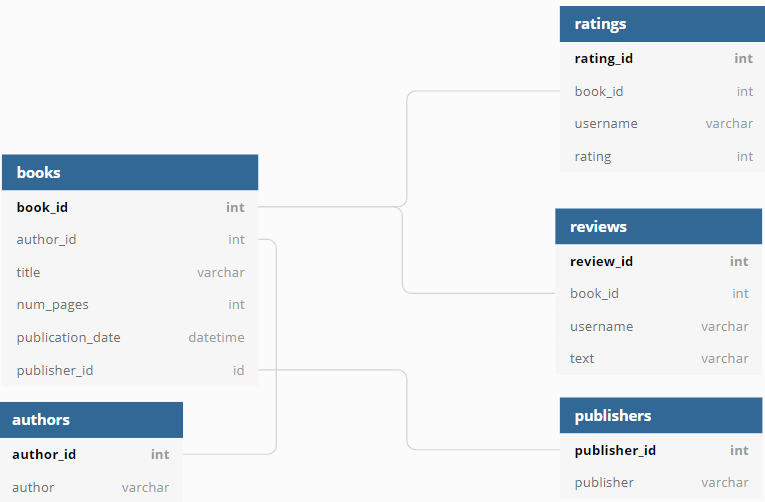

## Техническое задание

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так можно исключить из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывайть только книги с 50 и более оценками;
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Ход исследования

## Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
con=engine.connect()

In [3]:
# функция, принимающая sql-запрос и выводящая результат
def result(query):
    return pd.io.sql.read_sql(query, con = engine)

## Информация о таблицах 

In [4]:
list = ['books', 'authors', 'ratings', 'reviews', 'publishers']

for item in list:
    query = f'SELECT * FROM {item} LIMIT 5'
    print('Информация о таблице', item)
    display(result(query))    

Информация о таблице books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Информация о таблице authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Информация о таблице ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Информация о таблице reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Информация о таблице publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


## Решение задач

### Посчитать, сколько книг вышло после 1 января 2000 года

In [5]:
query = '''
SELECT count(book_id)
FROM books
WHERE publication_date > '2000-01-01'

'''
result(query)

,count
0,819


*После 1 января 2000 года было выпущено 819 книг.*

### Для каждой книги посчитать количество обзоров и среднюю оценку

In [6]:
query = '''
SELECT b.book_id,
       b.title,
       COUNT(DISTINCT r.review_id) AS reviews,
       AVG(ra.rating) AS avg_rating
       
FROM ratings AS ra
LEFT JOIN books AS b ON b.book_id = ra.book_id
LEFT JOIN reviews AS r ON b.book_id = r.book_id

GROUP BY b.book_id, b.title
ORDER BY avg_rating desc, reviews desc
LIMIT 10;
'''
result(query)

,book_id,title,reviews,avg_rating
0,17,A Dirty Job (Grim Reaper #1),4,5.0
1,553,School's Out—Forever (Maximum Ride #2),3,5.0
2,444,Moneyball: The Art of Winning an Unfair Game,3,5.0
3,169,Crucial Conversations: Tools for Talking When ...,2,5.0
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.0
5,62,Alas Babylon,2,5.0
6,57,Act of Treason (Mitch Rapp #9),2,5.0
7,20,A Fistful of Charms (The Hollows #4),2,5.0
8,55,A Woman of Substance (Emma Harte Saga #1),2,5.0
9,76,Angels Fall,2,5.0


In [7]:
query = '''
SELECT b.book_id,
       b.title,
       COUNT(DISTINCT r.review_id) AS reviews,
       AVG(ra.rating) AS avg_rating
       
FROM ratings AS ra
LEFT JOIN books AS b ON b.book_id = ra.book_id
LEFT JOIN reviews AS r ON b.book_id = r.book_id

GROUP BY b.book_id, b.title
ORDER BY reviews desc, avg_rating desc
LIMIT 10;
'''
result(query)

,book_id,title,reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.662500
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
3,656,The Book Thief,6,4.264151
4,734,The Glass Castle,6,4.206897
5,497,Outlander (Outlander #1),6,4.125000
6,750,The Hobbit or There and Back Again,6,4.125000
7,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
8,779,The Lightning Thief (Percy Jackson and the Oly...,6,4.080645
9,963,Water for Elephants,6,3.977273


*Наибольшее количество обзоров у книги Twilight (Twilight #1) - 7 и средний рейтинг 3,66. Наивысший рейтинг (5,0) и количество обзоров (4) у книги A Dirty Job (Grim Reaper #1).*

### Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

In [8]:
query = '''
SELECT p.publisher_id,
       p.publisher,
       COUNT(b.book_id) AS cnt_books
       
FROM publishers AS p

LEFT JOIN books AS b on p.publisher_id=b.publisher_id

WHERE num_pages >= 50 

GROUP BY p.publisher_id,p.publisher
ORDER BY cnt_books DESC
LIMIT 5;

'''
result(query)

,publisher_id,publisher,cnt_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,35,Bantam,19


*Издательство "Penguin Books" выпустило больше всего книг толще 50 страниц*

### Определить автора с самой высокой средней оценкой книг

In [9]:
query = '''
SELECT a.author,
       avg(r.rating) AS avg_rating
FROM authors AS a

LEFT JOIN books AS b ON a.author_id=b.author_id
LEFT JOIN ratings AS r ON b.book_id=r.book_id

WHERE b.book_id in (SELECT r.book_id
                     FROM ratings AS r
                     GROUP BY r.book_id
                     HAVING COUNT(r.rating_id) >=50
                     ORDER BY COUNT (rating_id) DESC)
GROUP BY a.author
ORDER BY avg_rating DESC
LIMIT 5;

'''
result(query)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.246914
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


*Автор J.K.Rowling/Mary GrandPré имеет самый высокий рейтинг 4.28.*

### Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [10]:
query = '''
SELECT AVG(rev_cnt)

FROM (SELECT COUNT(rv.review_id) as rev_cnt,
      rv.username
       
FROM reviews AS rv

GROUP BY rv.username

HAVING username in (SELECT r.username
                       FROM ratings as r
                       GROUP BY r.username
                       HAVING COUNT(r.rating_id) > 48)) AS cnt

'''
result(query)

,avg
0,24.0


*Среднее количество обзоров от пользователей, поставивших 48 оценок - 24.*

# Выводы

- После 1 января 2000 года было выпущено 819 книг.
- Наибольшее количество обзоров у книги Twilight (Twilight #1) - 7 и средний рейтинг 3,66. Наивысший рейтинг (5,0) и количество обзоров (4) у книги A Dirty Job (Grim Reaper #1).
- Издательство "Penguin Books" выпустило больше всего книг толще 50 страниц
- Автор J.K.Rowling/Mary GrandPré имеет самый высокий рейтинг 4.28.
- Среднее количество обзоров от пользователей, поставивших 48 оценок - 24.